In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt 
import seaborn as sns 

In [23]:
ebooks = pd.read_csv('Data/bestsellers_amazon.csv')
ebooks.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [24]:
ebooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [25]:
ebooks.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [26]:
ebooks.groupby("User Rating").count().sort_values("Name")["Name"] #groupby based on userratings

User Rating
3.3      1
3.6      1
3.8      2
3.9      3
4.1      6
4.2      8
4.0     14
4.3     25
4.4     38
4.9     52
4.5     60
4.6    105
4.7    108
4.8    127
Name: Name, dtype: int64

### Finding top 50 ebooks

In [27]:
top_ebooks = ebooks.sort_values(["User Rating","Reviews"],ascending = False).head(50) 
top_ebooks.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
246,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2013,Fiction
247,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2014,Fiction
248,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2015,Fiction
249,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2016,Fiction
250,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2017,Fiction
251,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2018,Fiction
252,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2019,Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


### Cleaning the Data for Further Analysis

In [28]:
top_ebooks.isnull().values.any()

False

In [29]:
top_ebooks.groupby("Author").count().sort_values("Name")["Name"] #finding Author of top 50 ebooks

Author
Jeff Kinney              1
Chip Gaines              1
Pete Souza               1
Patrick Thorpe           1
Nathan W. Pyle           1
J. K. Rowling            1
Mark R. Levin            1
Lin-Manuel Miranda       1
Jill Twiss               1
Rush Limbaugh            2
Bill Martin Jr.          2
Sherri Duskey Rinker     2
J.K. Rowling             3
Emily Winfield Martin    4
Sarah Young              6
Eric Carle               7
Dav Pilkey               7
Dr. Seuss                8
Name: Name, dtype: int64

**Here J K Rowling has come two times as author** *need to merge this

In [30]:
ebooks["Author"].replace("J. K. Rowling","J.K. Rowling",inplace = True)  #replaced the space on JK rowling col

top_ebooks = ebooks.sort_values(["User Rating","Reviews"],ascending = False).head(50)
top_ebooks.groupby("Author").count().sort_values("Name")["Name"]

Author
Jill Twiss               1
Chip Gaines              1
Pete Souza               1
Patrick Thorpe           1
Nathan W. Pyle           1
Mark R. Levin            1
Jeff Kinney              1
Lin-Manuel Miranda       1
Rush Limbaugh            2
Bill Martin Jr.          2
Sherri Duskey Rinker     2
J.K. Rowling             4
Emily Winfield Martin    4
Sarah Young              6
Eric Carle               7
Dav Pilkey               7
Dr. Seuss                8
Name: Name, dtype: int64

In [31]:
top_ebooks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 245 to 156
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         50 non-null     object 
 1   Author       50 non-null     object 
 2   User Rating  50 non-null     float64
 3   Reviews      50 non-null     int64  
 4   Price        50 non-null     int64  
 5   Year         50 non-null     int64  
 6   Genre        50 non-null     object 
dtypes: float64(1), int64(3), object(3)
memory usage: 3.1+ KB


## Plotting the Visualizations
**On based on Genre**

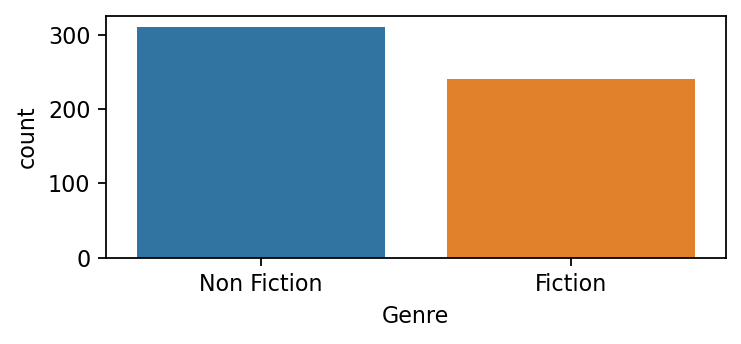

In [40]:
plt.figure(figsize=(5,2),dpi=160)
sns.countplot(x='Genre',data=ebooks);